# ECON 626 Prediction Competition 4 Code


Objective: Utilize regression algorithms (linear regression, LASSO, Ridge, Subset Selection) to train a model that predicts the natural logarithm of car price.

## Importing Librarys

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model # Linear regression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


## Importing data

In [2]:
small_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 4/pc3_and_pc4_training_data_small_v1.csv"
small_df= pd.read_csv(small_data_path)
#create a dataframe for our smaller dataset

large_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 4/pc3_and_pc4_training_data_large_v1.csv"
large_df = pd.read_csv(large_data_path)
#create a dataframe for our larger dataset

test_data_path = "/Users/andrew/Downloads/UW courses/ECON 626/Prediction Competition 4/pc4_test_data_without_response_v1.csv"
test_df = pd.read_csv(test_data_path)
#create a dataframe for our larger dataset

total_df  = pd.concat([small_df, large_df], axis = 0)
#create a dataframe containing both small and large df

## Inspect data

In [3]:
#function:
def inspect_dataset(dataset):
    # Print the head of the dataset
    print("Head of the dataset:")
    print(dataset.head())
    print("\n")

    # Print the info of the dataset
    print("Info of the dataset:")
    print(dataset.info())
    print("\n")

    # Print the shape of the dataset
    print("Shape of the dataset:")
    print(dataset.shape)
    print("\n")

    # Print value counts for columns of type object
    object_columns = dataset.select_dtypes(include=['object']).columns
    for column in object_columns:
        print(f"Value counts for column '{column}':")
        print(dataset[column].value_counts())
        print("\n")

In [4]:
small_df.head()

price back_legroom        body_type  engine_displacement  \
0  18495.0      44.5 in     Pickup Truck                 5700   
1  16422.0      41.4 in            Sedan                 1800   
2  39935.0      36.5 in            Sedan                 2000   
3  23949.0      38.7 in  SUV / Crossover                 3500   
4  37545.0      35.2 in            Sedan                 2000   

     exterior_color fuel_type   height  highway_fuel_economy  horsepower  \
0            MAROON  Gasoline  75.6 in                    18         381   
1  Black Sand Pearl  Gasoline  57.3 in                    38         132   
2         JET BLACK  Gasoline  58.2 in                    34         248   
3  Brilliant Silver  Gasoline  67.8 in                    28         260   
4             Black  Gasoline  56.3 in                    33         255   

    latitude    length listed_date   longitude  mileage wheel_system  \
0  32.803101  228.7 in  2020-09-02  -96.779701   167184          4X2   
1  38.371700  182.6 in  2020-07-25  -86.958900    29451          FWD   
2  34.137100  194.6 in  2020-08-08 -118.255000    14984          RWD   
3  34.064899  192.8 in  2020-06-21  -81.143600    15697          FWD   
4  38.899200  184.5 in  2020-09-06  -77.461800     6907          AWD   

  wheelbase    width  year  
0  145.7 in  79.9 in  2008  
1  106.3 in  69.9 in  2016  
2  117.1 in  83.7 in  2019  
3  111.2 in  75.4 in  2020  
4  111.8 in  79.4 in  2020

In [5]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 100000 non-null  float64
 1   back_legroom          100000 non-null  object 
 2   body_type             100000 non-null  object 
 3   engine_displacement   100000 non-null  int64  
 4   exterior_color        97934 non-null   object 
 5   fuel_type             100000 non-null  object 
 6   height                100000 non-null  object 
 7   highway_fuel_economy  100000 non-null  int64  
 8   horsepower            100000 non-null  int64  
 9   latitude              100000 non-null  float64
 10  length                100000 non-null  object 
 11  listed_date           100000 non-null  object 
 12  longitude             100000 non-null  float64
 13  mileage               100000 non-null  int64  
 14  wheel_system          100000 non-null  object 
 15  w

In [6]:
small_df.isna().sum()

price                      0
back_legroom               0
body_type                  0
engine_displacement        0
exterior_color          2066
fuel_type                  0
height                     0
highway_fuel_economy       0
horsepower                 0
latitude                   0
length                     0
listed_date                0
longitude                  0
mileage                    0
wheel_system               0
wheelbase                  0
width                      0
year                       0
dtype: int64

In [7]:
small_df.shape

(100000, 18)

## Data Visualizations

<Axes: xlabel='body_type'>

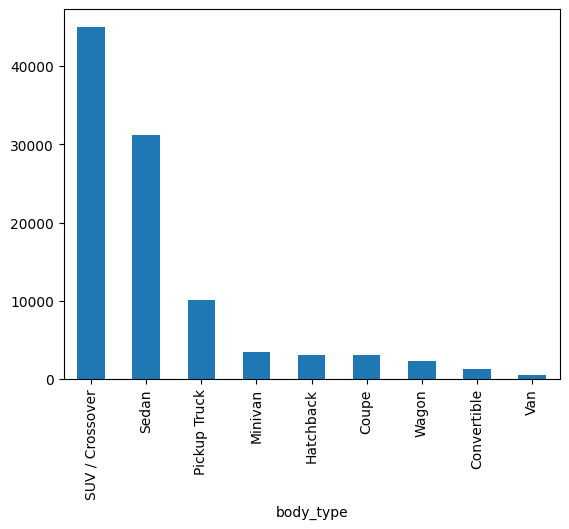

In [8]:
small_df['body_type'].value_counts().plot(kind='bar')

<Axes: xlabel='fuel_type'>

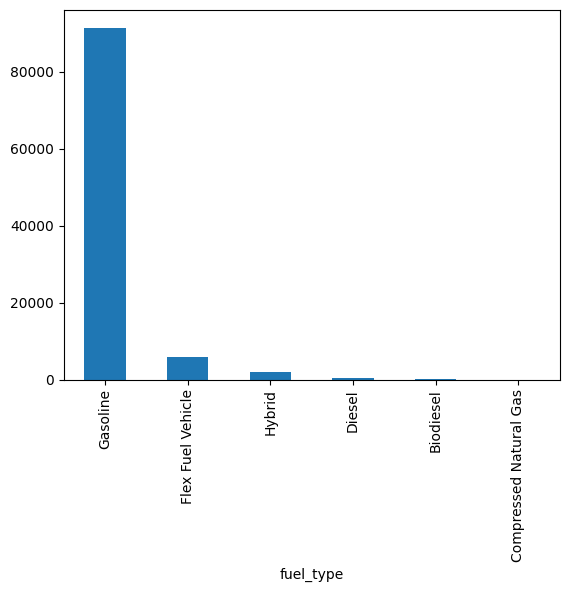

In [9]:
small_df['fuel_type'].value_counts().plot(kind='bar')

<Axes: xlabel='wheel_system'>

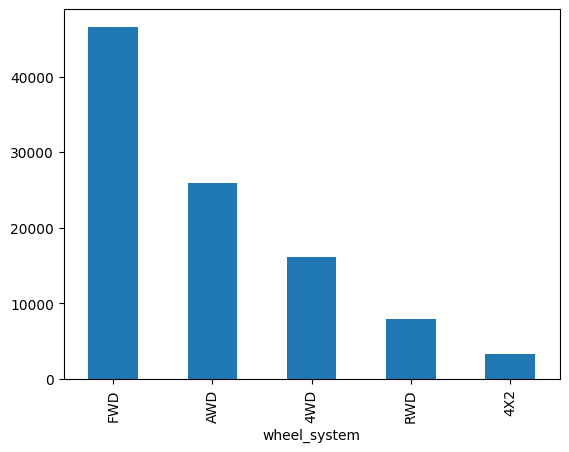

In [10]:
small_df['wheel_system'].value_counts().plot(kind='bar')


In [11]:
numerical_columns = small_df.select_dtypes(include=np.number).columns.tolist()

num_drop_list = 'latitude', 'price', 'longitude'

numerical_columns = list(set(numerical_columns) - set(num_drop_list))

In [12]:
categorical_columns = small_df.select_dtypes(exclude=np.number).columns.tolist()
categorical_columns

cat_drop_list = 'back_legroom', 'height', 'length', 'listed_date', 'wheelbase', 'width', 'exterior_color'

categorical_columns = list(set(categorical_columns) - set(cat_drop_list))

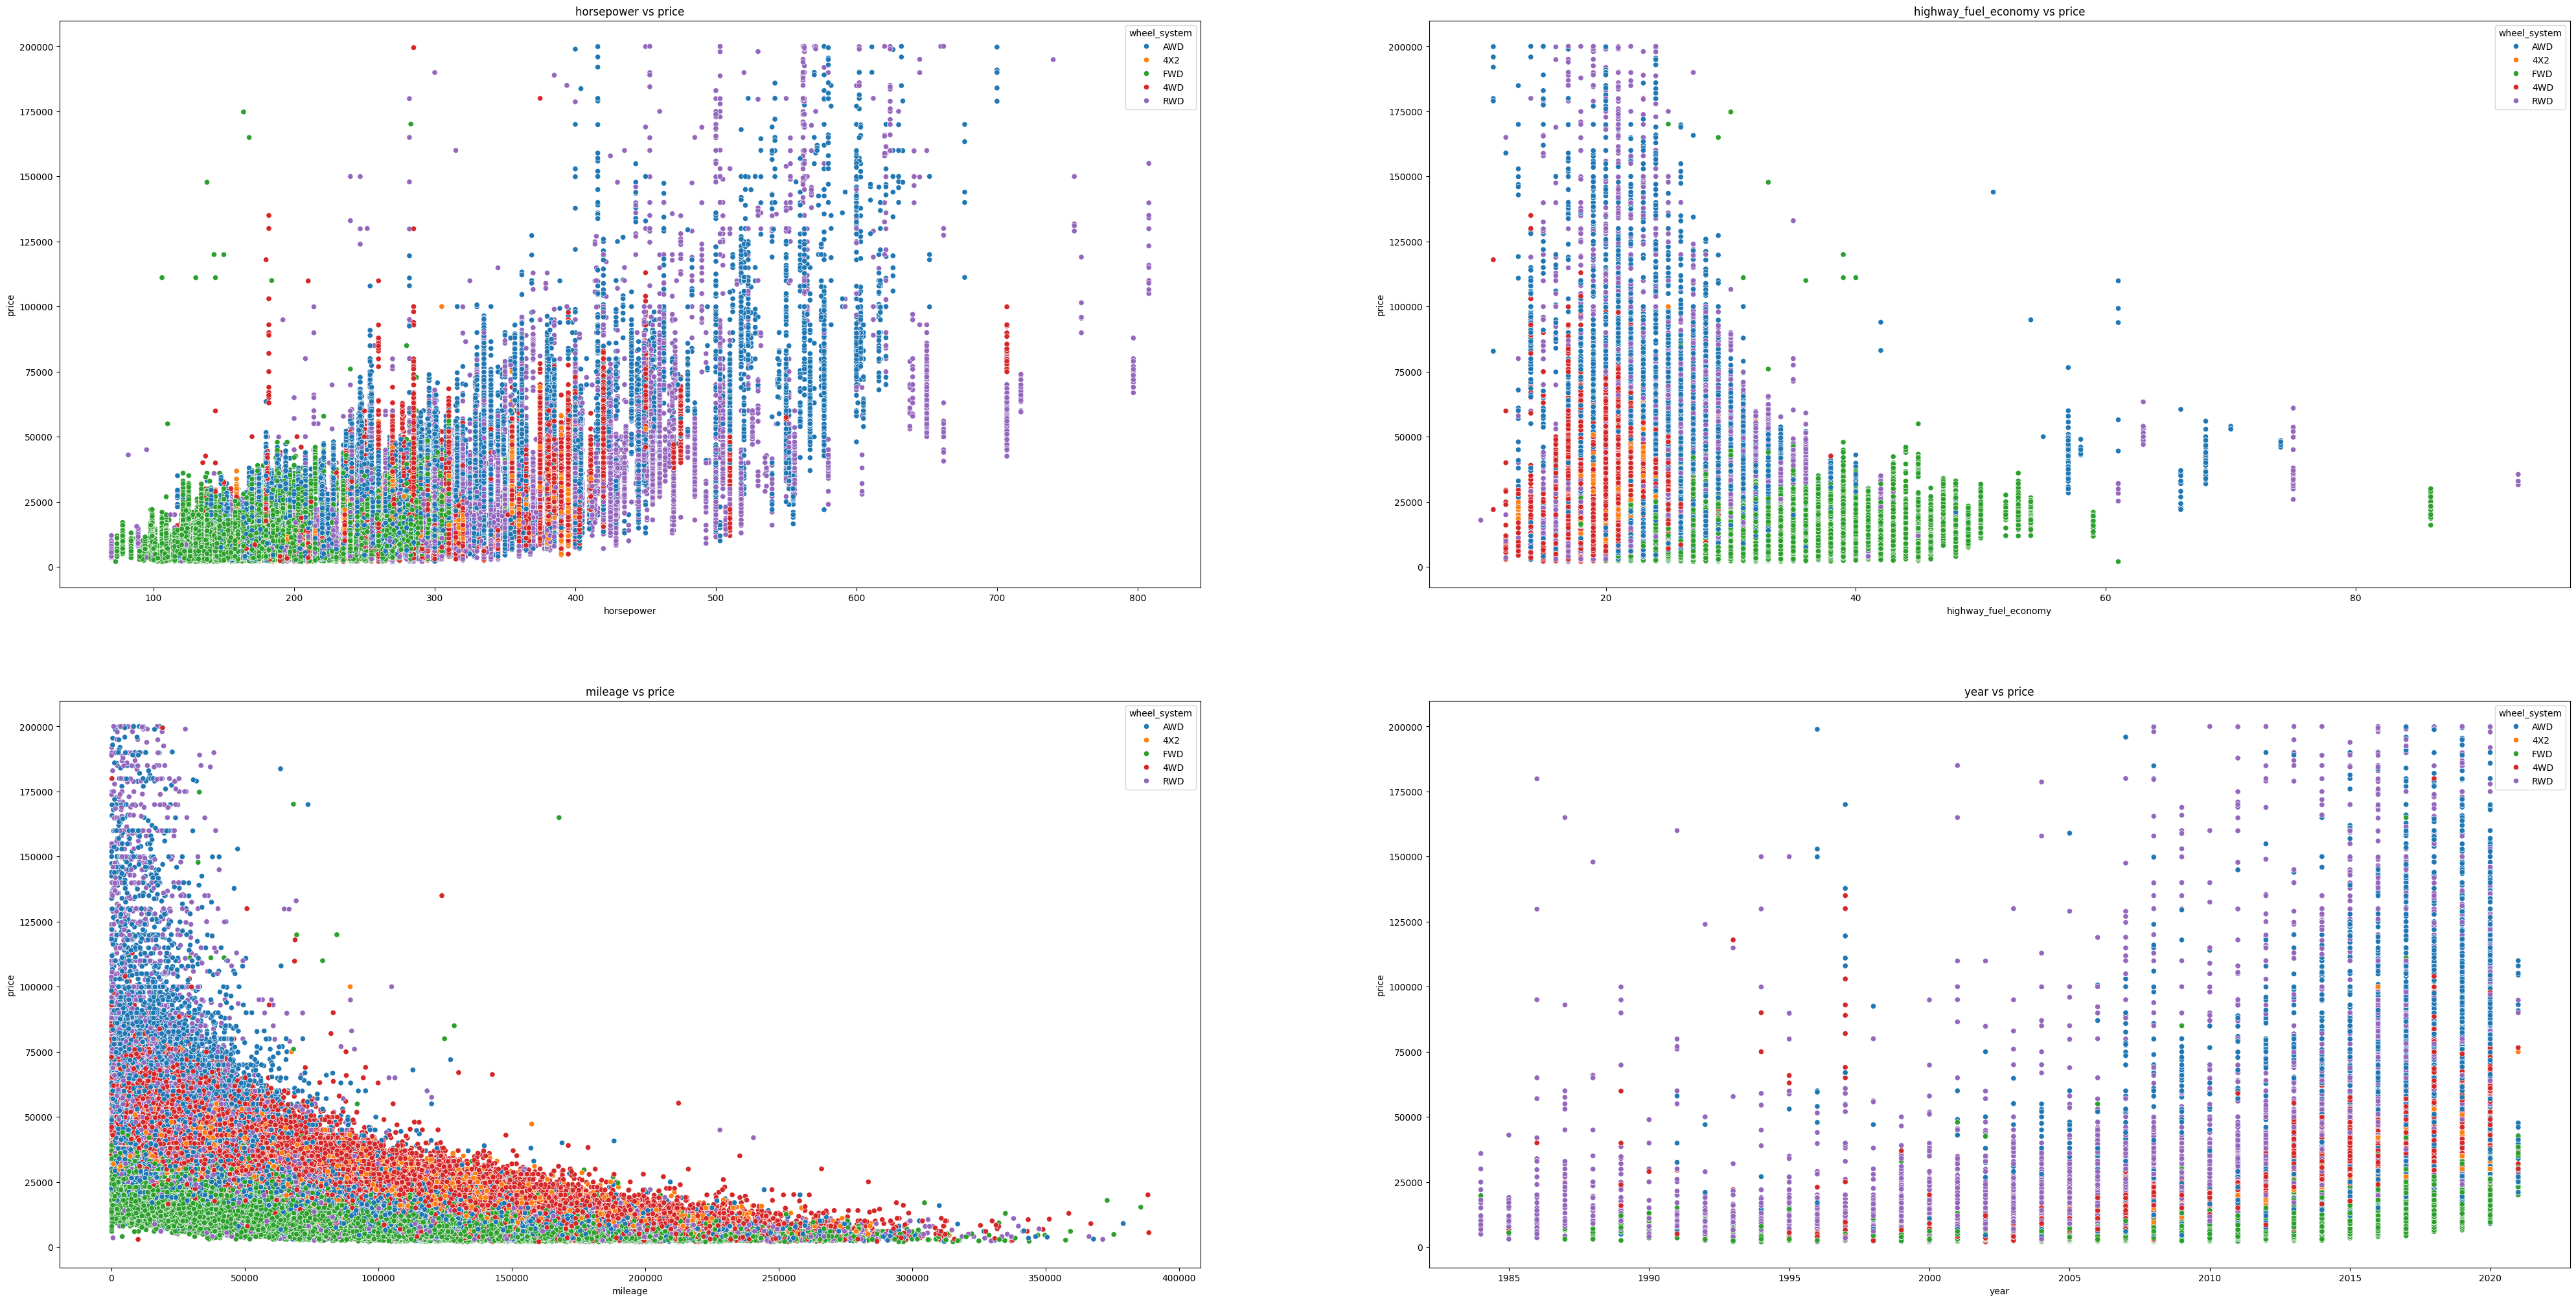

In [59]:
plt.figure(figsize = (50, 25))
for i, value in enumerate(numerical_columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.title( value + ' vs price')
    sns.scatterplot(data = large_df, x = value, y = 'price', hue = 'wheel_system')

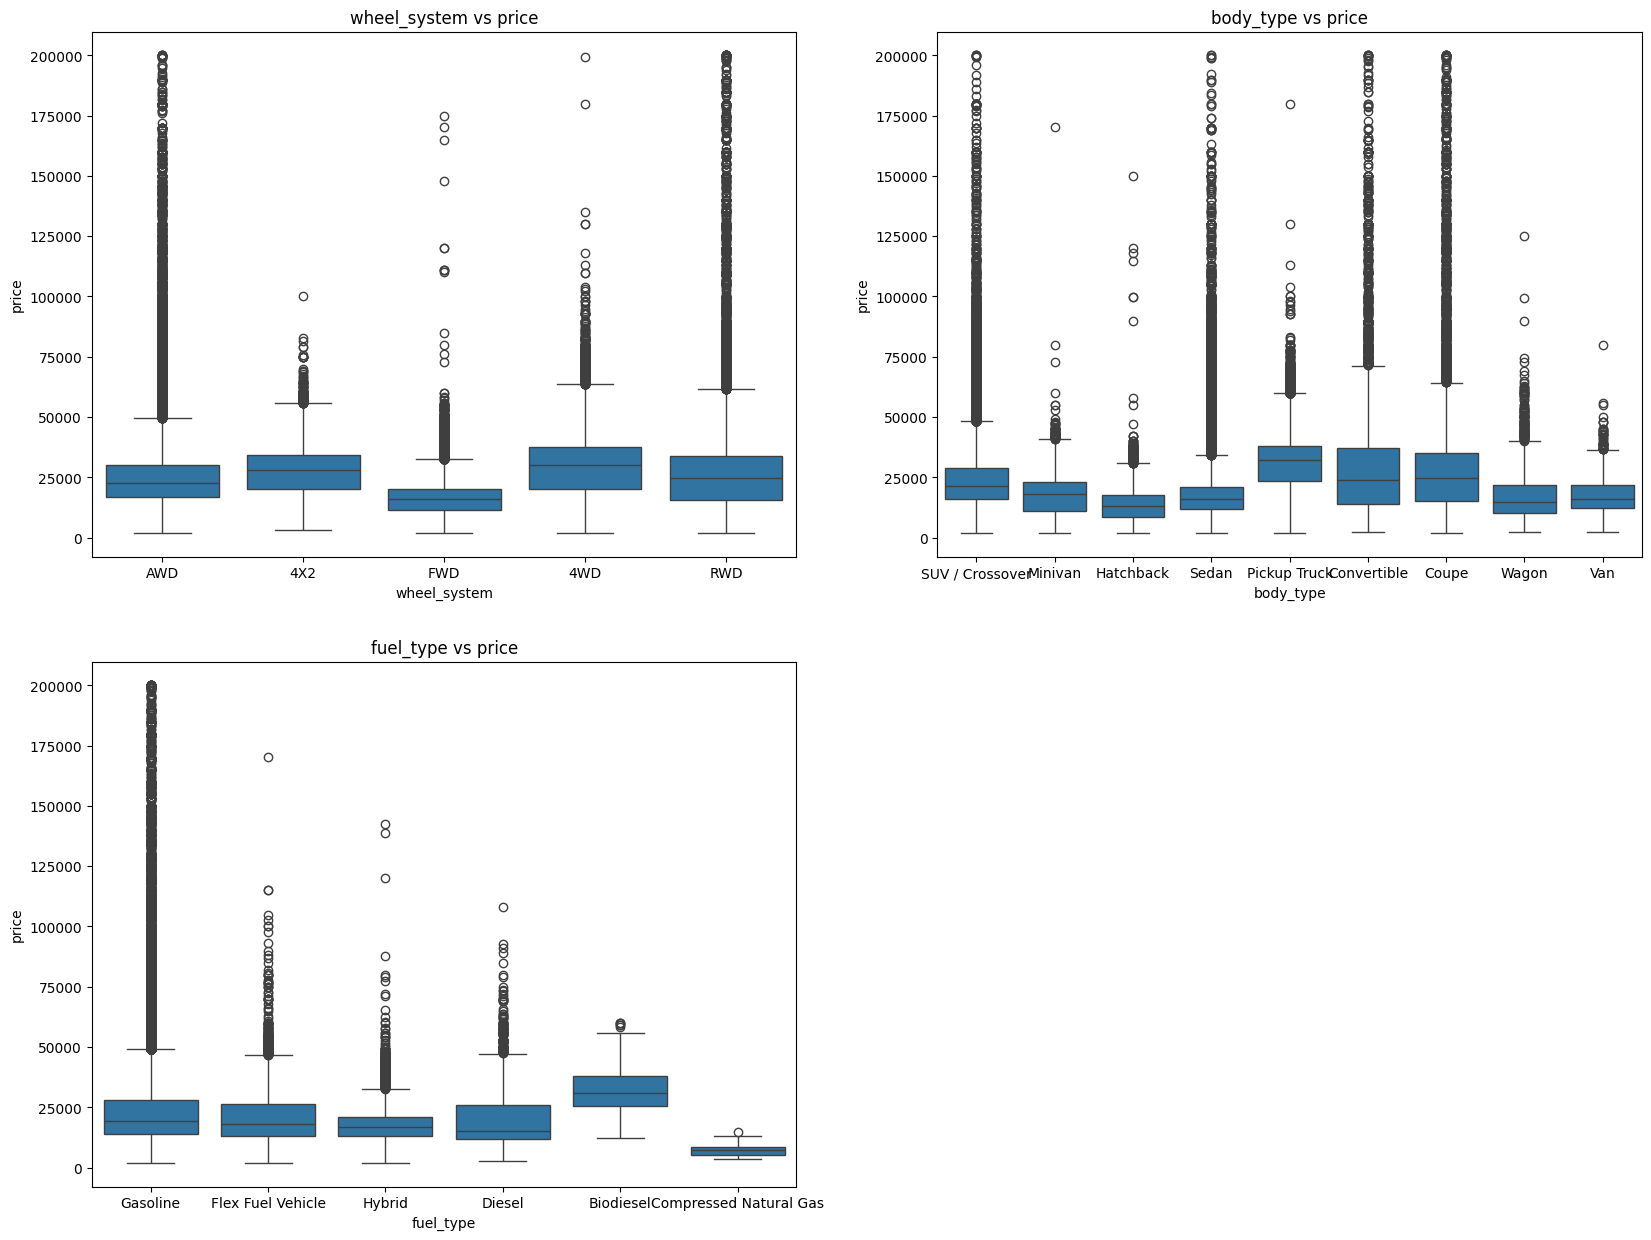

In [14]:
plt.figure(figsize = (20, 15))
for i, value in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)
    plt.title( value + ' vs price')
    sns.boxplot(data = large_df, x = value, y = 'price')

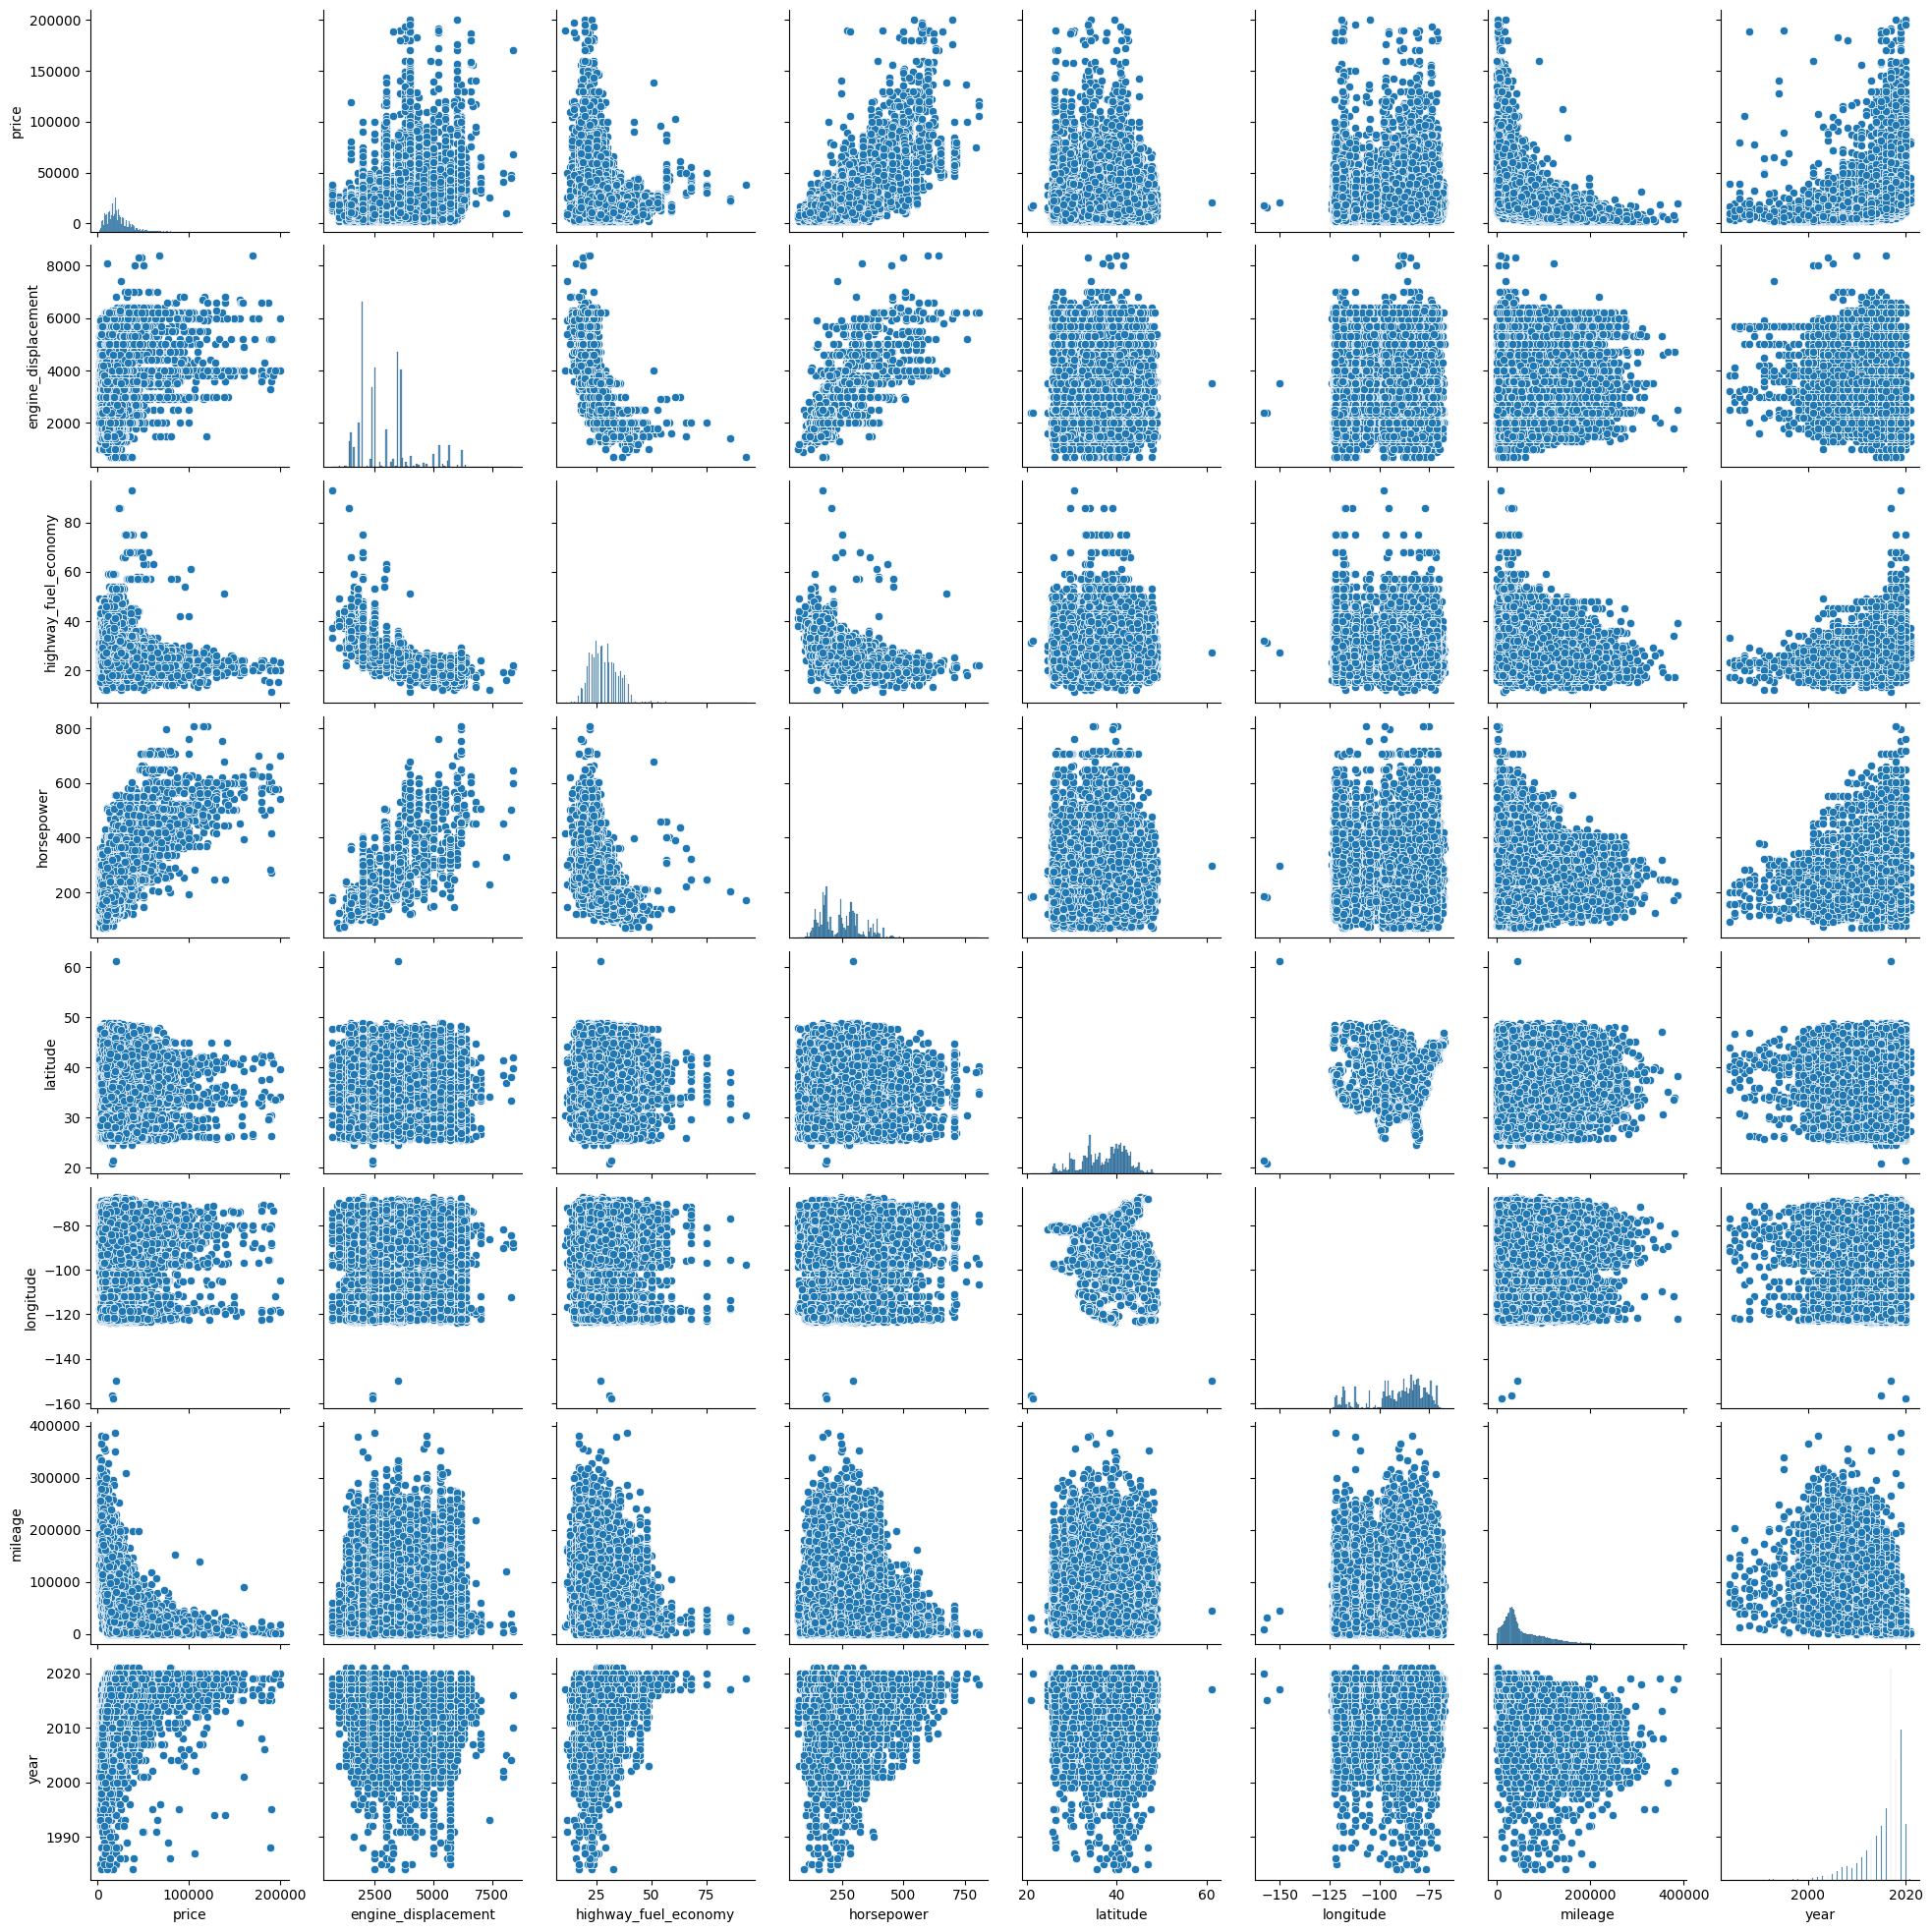

In [15]:
numeric_df = small_df.select_dtypes(include='number')

# Create pairplot
sns.pairplot(numeric_df)

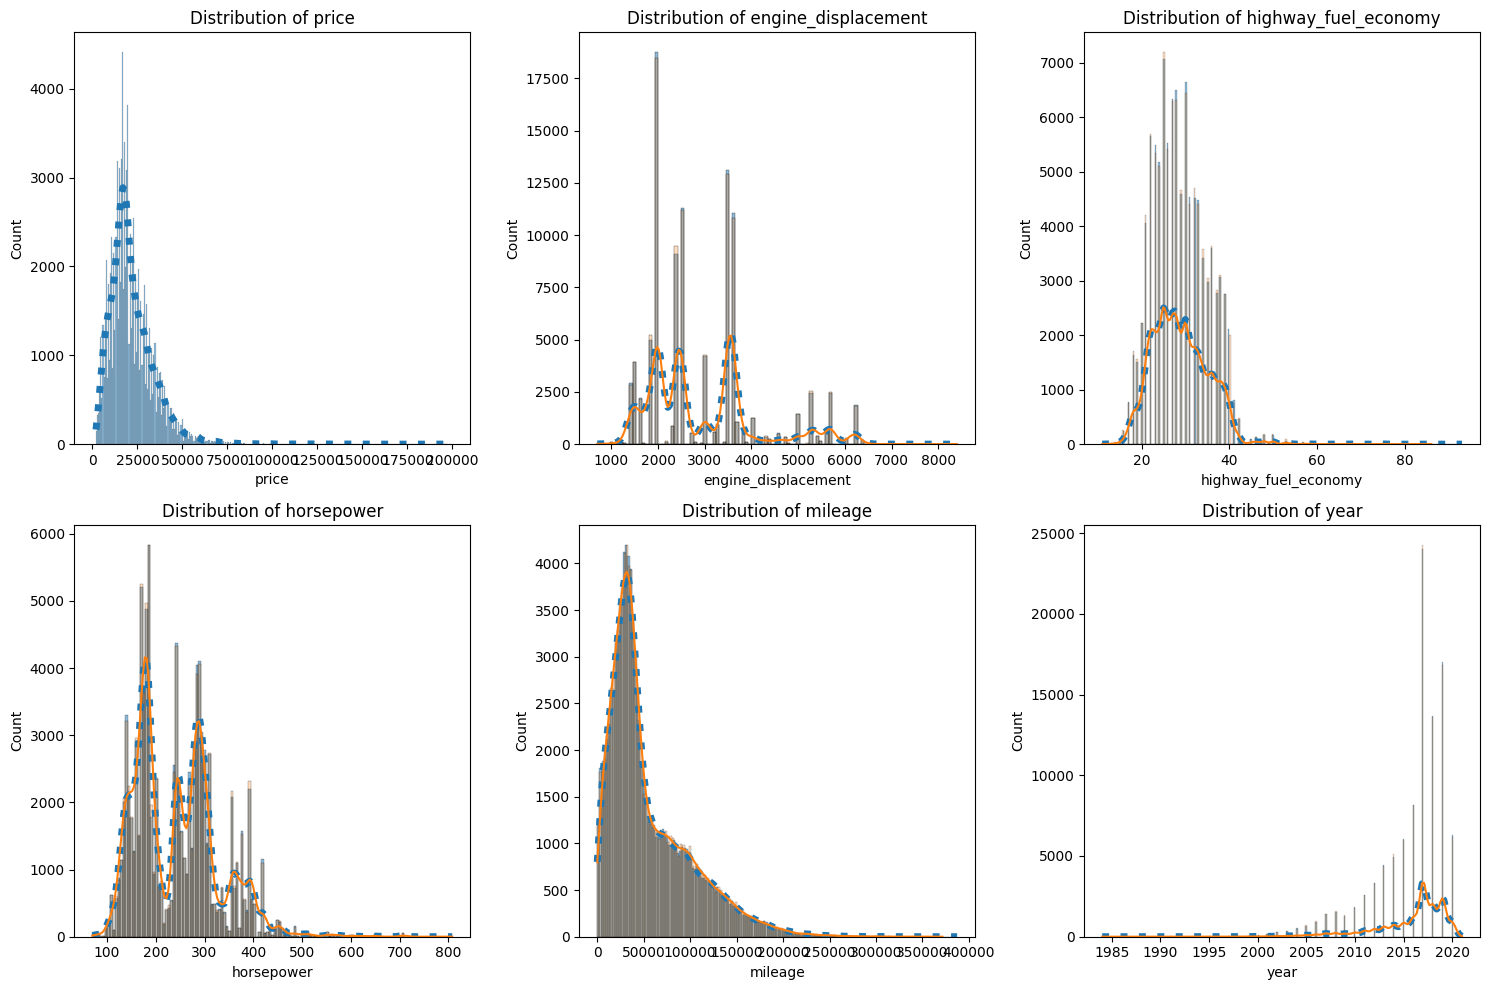

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

og_cols = ['price', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'mileage', 'year']
num_cols = len(og_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust figsize as needed

for i, col in enumerate(og_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols

    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={'lw': 5, 'ls': ':'})  # Add KDE plot
    sns.histplot(test_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_13898/2936335544.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_13898/2936335544.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_13898/2936335544.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


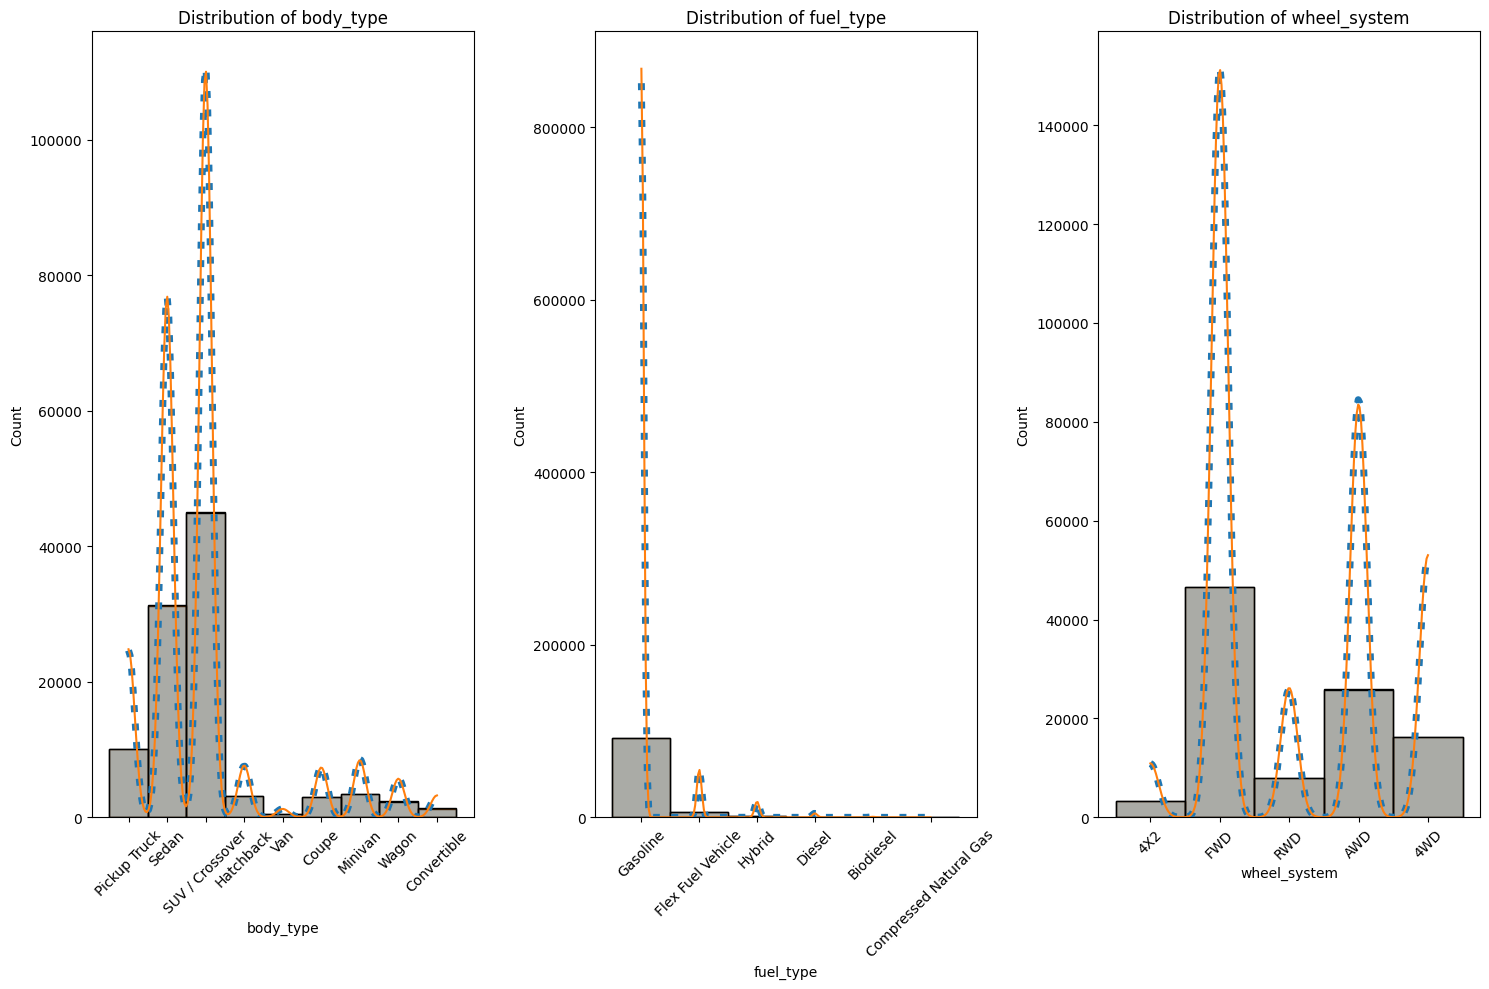

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

og_cat_cols = ['body_type', 'fuel_type', 'wheel_system']
num_cols = len(og_cat_cols)

# Calculate the number of rows and columns needed for subplots
num_rows = (num_cols + 2) // 3  # Ceiling division to ensure we have enough rows
num_cols = min(num_cols, 3)  # Limit the number of columns to 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust figsize as needed

for i, col in enumerate(og_cat_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    sns.histplot(small_df[col], ax=ax, kde=True, line_kws={'lw': 5, 'ls': ':'}) 
    sns.histplot(test_df[col], ax=ax, kde=True, alpha=0.25)
    
    ax.set_title('Distribution of ' + col)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()


In [18]:
    small_df['listed_date'] = pd.to_datetime(small_df['listed_date'])
    listed_year = small_df['listed_date'].dt.year
    small_df['age_at_listing'] = listed_year - small_df['year']

In [19]:
small_df

price back_legroom        body_type  engine_displacement  \
0      18495.0      44.5 in     Pickup Truck                 5700   
1      16422.0      41.4 in            Sedan                 1800   
2      39935.0      36.5 in            Sedan                 2000   
3      23949.0      38.7 in  SUV / Crossover                 3500   
4      37545.0      35.2 in            Sedan                 2000   
...        ...          ...              ...                  ...   
99995  41008.0      39.7 in  SUV / Crossover                 5300   
99996  13933.0      35.1 in            Sedan                 2000   
99997   5597.0      36.2 in        Hatchback                 2400   
99998   8942.0      35.6 in  SUV / Crossover                 2500   
99999  10990.0      34.5 in        Hatchback                 1500   

         exterior_color fuel_type   height  highway_fuel_economy  horsepower  \
0                MAROON  Gasoline  75.6 in                    18         381   
1      Black Sand Pearl  Gasoline  57.3 in                    38         132   
2             JET BLACK  Gasoline  58.2 in                    34         248   
3      Brilliant Silver  Gasoline  67.8 in                    28         260   
4                 Black  Gasoline  56.3 in                    33         255   
...                 ...       ...      ...                   ...         ...   
99995             Green  Gasoline  74.4 in                    22         355   
99996      Alpine White  Gasoline  56.3 in                    33         240   
99997            Silver  Gasoline    61 in                    29         158   
99998             White  Gasoline  67.8 in                    27         171   
99999              Blue  Gasoline    60 in                    33         117   

        latitude    length listed_date   longitude  mileage wheel_system  \
0      32.803101  228.7 in  2020-09-02  -96.779701   167184          4X2   
1      38.371700  182.6 in  2020-07-25  -86.958900    29451          FWD   
2      34.137100  194.6 in  2020-08-08 -118.255000    14984          RWD   
3      34.064899  192.8 in  2020-06-21  -81.143600    15697          FWD   
4      38.899200  184.5 in  2020-09-06  -77.461800     6907          AWD   
...          ...       ...         ...         ...      ...          ...   
99995  35.101898  224.4 in  2020-08-29  -77.092499    47980          4WD   
99996  42.767601  182.5 in  2020-08-12  -73.814301    98430          AWD   
99997  35.358799  171.1 in  2020-06-27  -86.202599   114428          FWD   
99998  40.054401  174.7 in  2020-08-16  -74.892197    63256          AWD   
99999  44.882900  161.6 in  2020-08-18  -93.080498    76035          FWD   

      wheelbase    width  year  age_at_listing  
0      145.7 in  79.9 in  2008              12  
1      106.3 in  69.9 in  2016               4  
2      117.1 in  83.7 in  2019               1  
3      111.2 in  75.4 in  2020               0  
4      111.8 in  79.4 in  2020               0  
...         ...      ...   ...             ...  
99995    130 in  80.5 in  2018               2  
99996  110.6 in    80 in  2013               7  
99997  102.4 in  69.5 in  2010              10  
99998  103.1 in  81.3 in  2012               8  
99999   98.4 in  66.7 in  2013               7  

[100000 rows x 19 columns]

## Data Preprocessing

In [20]:
def extract_numeric_value(text):
    # Use regular expression to extract numeric value
    match = re.match(r'(\d+)', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

In [21]:
#Testing
# small_df['length'] = pd.to_numeric(small_df['length'].str.replace(' in', ''), errors='coerce')
# small_df['length']

small_df['length'] = pd.to_numeric(small_df['length'].astype(str).str.replace(' in', ''), errors='coerce')
small_df['width'] = pd.to_numeric(small_df['width'].astype(str).str.replace(' in', ''), errors='coerce')
small_df['height'] = pd.to_numeric(small_df['height'].astype(str).str.replace(' in', ''), errors='coerce')

small_df.isna().sum()

#small_df["car_vol"] = small_df["length"] * small_df["width"]* small_df["height"]

price                      0
back_legroom               0
body_type                  0
engine_displacement        0
exterior_color          2066
fuel_type                  0
height                    33
highway_fuel_economy       0
horsepower                 0
latitude                   0
length                    33
listed_date                0
longitude                  0
mileage                    0
wheel_system               0
wheelbase                  0
width                     33
year                       0
age_at_listing             0
dtype: int64

In [22]:
small_df[small_df['length'].isnull()].head()

price back_legroom        body_type  engine_displacement  \
1232   20981.0           --  SUV / Crossover                 2000   
5010   21976.0           --  SUV / Crossover                 2000   
6256   48995.0           --            Sedan                 2900   
6600   23988.0           --  SUV / Crossover                 2000   
11525  24655.0           --  SUV / Crossover                 2000   

              exterior_color fuel_type  height  highway_fuel_economy  \
1232          Mineral Silver  Gasoline     NaN                    23   
5010            Black Cherry  Gasoline     NaN                    23   
6256   Trofeo White Tri-Coat  Gasoline     NaN                    24   
6600          Mineral Silver  Gasoline     NaN                    23   
11525         Mineral Silver  Gasoline     NaN                    23   

       horsepower   latitude  length listed_date   longitude  mileage  \
1232          260  39.923500     NaN  2020-08-16  -83.124397    41577   
5010          260  39.024601     NaN  2020-06-13 -108.500000    30187   
6256          505  33.423901     NaN  2020-09-02  -84.178703    14521   
6600          260  39.625999     NaN  2020-08-09 -105.093000    28459   
11525         260  40.407398     NaN  2020-08-14 -105.063000    22441   

      wheel_system wheelbase  width  year  age_at_listing  
1232           AWD        --    NaN  2017               3  
5010           AWD        --    NaN  2017               3  
6256           RWD        --    NaN  2017               3  
6600           AWD        --    NaN  2017               3  
11525          AWD        --    NaN  2017               3

In [23]:
#Groups the lengths by catagorys then fills NA with mean from that catagory
small_df['length'] = small_df['length'].fillna(small_df.groupby('body_type')['length'].transform('mean'))
small_df['width'] = small_df['width'].fillna(small_df.groupby('body_type')['width'].transform('mean'))
small_df['height'] = small_df['height'].fillna(small_df.groupby('body_type')['height'].transform('mean'))

In [24]:
small_df.isna().sum()


price                      0
back_legroom               0
body_type                  0
engine_displacement        0
exterior_color          2066
fuel_type                  0
height                     0
highway_fuel_economy       0
horsepower                 0
latitude                   0
length                     0
listed_date                0
longitude                  0
mileage                    0
wheel_system               0
wheelbase                  0
width                      0
year                       0
age_at_listing             0
dtype: int64

In [25]:
small_df['fuel_type'].value_counts()

fuel_type
Gasoline                  91538
Flex Fuel Vehicle          5902
Hybrid                     1963
Diesel                      507
Biodiesel                    87
Compressed Natural Gas        3
Name: count, dtype: int64

In [26]:
#Creating a function to preprocess the data
def prep_data(dataset):
    
    dataset_cols = dataset.columns
    if 'price' in dataset_cols:
        dataset['log_price'] = np.log(dataset['price'])
    else:
        pass

    #Feature Engineering
    dataset['length'] = pd.to_numeric(dataset['length'].astype(str).str.replace(' in', ''), errors='coerce')
    dataset['length'] = dataset['length'].fillna(dataset.groupby('body_type')['length'].transform('mean'))

    dataset['width'] = pd.to_numeric(dataset['width'].astype(str).str.replace(' in', ''), errors='coerce')
    dataset['width'] = dataset['width'].fillna(dataset.groupby('body_type')['width'].transform('mean'))

    dataset['height'] = pd.to_numeric(dataset['height'].astype(str).str.replace(' in', ''), errors='coerce')
    dataset['height'] = dataset['height'].fillna(dataset.groupby('body_type')['height'].transform('mean'))

    # dataset['wheelbase'] = pd.to_numeric(dataset['wheelbase'].astype(str).str.replace(' in', ''), errors='coerce')
    # dataset['wheelbase'] = dataset['wheelbase'].fillna(dataset.groupby('body_type')['wheelbase'].transform('mean'))

    dataset["car_vol"] = dataset["length"] * dataset["width"]* dataset["height"]

    dataset['listed_date'] = pd.to_datetime(dataset['listed_date'])
    listed_year = dataset['listed_date'].dt.year
    dataset['age_at_listing'] = listed_year - dataset['year']

    # fuel_type_map = {'Gasoline': 1, 'Diesel': 0, 'Flex Fuel Vehicle' : 0, 'Hybrid': 0, 'Biodiesel' : 0, 'Compressed Natural Gas' : 0  }

    # # Apply the mapping to the 'fuel_type' column
    # dataset['fuel_type_binary'] = dataset['fuel_type'].map(fuel_type_map)

    drop = ['price', 'back_legroom', 'wheelbase', 'latitude', 'longitude', 'listed_date', 'exterior_color']
    for col in drop:
        dataset = dataset.drop([col], axis=1)
    
    col_encode = [ 'body_type', 'fuel_type', 'wheel_system']
    le = LabelEncoder()
    for col in col_encode:
        new_col = col+'_enc'
        dataset[new_col] = le.fit_transform(dataset[col])
    dataset['litres'] = (dataset['engine_displacement']/1000).astype(float)
    dataset = dataset.drop(['engine_displacement'], axis=1)
    drop_enc= ['body_type', 'fuel_type', 'wheel_system']
    for col in drop_enc:
        dataset = dataset.drop([col], axis=1)
    return dataset

In [27]:
train_df = prep_data(total_df)

In [28]:
test_df = prep_data(test_df)

In [29]:
train_df

height  highway_fuel_economy  horsepower  length  mileage  width  \
0         75.6                    18         381   228.7   167184   79.9   
1         57.3                    38         132   182.6    29451   69.9   
2         58.2                    34         248   194.6    14984   83.7   
3         67.8                    28         260   192.8    15697   75.4   
4         56.3                    33         255   184.5     6907   79.4   
...        ...                   ...         ...     ...      ...    ...   
499995    65.7                    26         172   173.6   102204   69.1   
499996    64.8                    29         168   171.9    34234   71.3   
499997    69.3                    25         295   189.8    38511   84.8   
499998    48.9                    29         455   176.9     9073   73.9   
499999    69.0                    18         283   203.7    36328   88.5   

        year  log_price      car_vol  age_at_listing  body_type_enc  \
0       2008   9.825256  1381448.628              12              4   
1       2016   9.706377   731362.302               4              6   
2       2019  10.595008   947962.764               1              6   
3       2020  10.083682   985616.736               0              5   
4       2020  10.533295   824755.590               0              6   
...      ...        ...          ...             ...            ...   
499995  2012   9.045112   788121.432               8              5   
499996  2018   9.798016   794219.256               2              5   
499997  2018  10.292146  1115386.272               2              5   
499998  2016  10.778956   639265.299               4              0   
499999  2019   9.704122  1243894.050               1              3   

        fuel_type_enc  wheel_system_enc  litres  
0                   4                 1     5.7  
1                   4                 3     1.8  
2                   4                 4     2.0  
3                   4                 3     3.5  
4                   4                 2     2.0  
...               ...               ...     ...  
499995              4                 0     2.4  
499996              4                 3     2.4  
499997              4                 0     3.6  
499998              4                 4     6.2  
499999              3                 3     3.6  

[600000 rows x 14 columns]

In [30]:
test_df

height  highway_fuel_economy  horsepower  length  mileage  width  year  \
0        58.1                    22         310   180.9    10265   79.5  2019   
1        57.3                    36         132   183.1    35574   69.9  2017   
2        66.5                    33         190   180.6    10885   73.0  2019   
3        58.0                    40         188   191.8     2986   83.5  2019   
4        70.6                    24         278   212.3    17085   75.2  2019   
...       ...                   ...         ...     ...      ...    ...   ...   
99995    69.1                    22         201   173.0   173629   70.1  2002   
99996    70.7                    25         310   204.3    17214   78.6  2018   
99997    67.1                    29         176   183.5    33638   72.6  2017   
99998    77.7                    21         395   228.9    51327   82.1  2019   
99999    73.9                    22         355   230.0    25529   80.0  2018   

       log_price      car_vol  age_at_listing  body_type_enc  fuel_type_enc  \
0            NaN   835568.055               1              6              4   
1            NaN   733364.937               3              6              4   
2            NaN   876722.700               1              5              4   
3            NaN   928887.400               1              6              4   
4            NaN  1127126.176               1              4              4   
...          ...          ...             ...            ...            ...   
99995        NaN   837996.430              18              5              4   
99996        NaN  1135299.186               2              5              4   
99997        NaN   893912.910               3              5              4   
99998        NaN  1460192.013               1              4              4   
99999        NaN  1359760.000               2              4              4   

       wheel_system_enc  litres  
0                     2     2.5  
1                     3     1.8  
2                     2     1.5  
3                     3     2.0  
4                     1     3.5  
...                 ...     ...  
99995                 0     3.0  
99996                 0     3.6  
99997                 3     2.5  
99998                 0     5.7  
99999                 0     5.3  

[100000 rows x 14 columns]

In [31]:

#small_df['fuel_type_binary'].value_counts()

In [32]:
drop_low_importance = ['age_at_listing', 'car_vol', 'width']

for col in drop_low_importance:
    train_df = train_df.drop([col], axis=1)
    test_df = test_df.drop([col], axis=1)

#After running through the predictions previously I have found that these two columns are not important in predicting the price.

## Linear Regression

In [33]:
def split_data(dataset):
    global x_train, x_val_test, y_train, y_val_test, x_val, x_test, y_val, y_test
    #Must make the variables global to access the variables outside of the function

    columns_x = list(dataset.columns)
    if 'log_price' in columns_x:
        columns_x.remove('log_price')
    else:
        pass
    x_train, x_val_test, y_train, y_val_test = train_test_split(dataset[columns_x], dataset['log_price'], test_size=0.2, random_state=123)
    x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=123)
    
    #return x_train, x_val, x_test, y_train, y_val, y_test
    

In [34]:
split_data(train_df)

In [35]:
print(x_train.shape, x_val.shape, x_test.shape)

(480000, 10) (60000, 10) (60000, 10)


In [36]:
x_train.head()

height  highway_fuel_economy  horsepower  length  mileage  year  \
431111    59.6                    39         109   175.4    29279  2019   
352633    67.5                    33         170   182.3    24365  2016   
423966    67.3                    23         305   186.7   110974  2013   
301502    57.1                    27         272   191.1   136789  2007   
71067     57.3                    36         152   175.6    30849  2019   

        body_type_enc  fuel_type_enc  wheel_system_enc  litres  
431111              6              4                 3     1.6  
352633              5              4                 3     2.5  
423966              5              4                 2     3.7  
301502              6              4                 3     3.5  
71067               2              4                 2     2.0

In [37]:
x_train.isna().sum()

height                  0
highway_fuel_economy    0
horsepower              0
length                  0
mileage                 0
year                    0
body_type_enc           0
fuel_type_enc           0
wheel_system_enc        0
litres                  0
dtype: int64

In [38]:
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(x_train)
# transform
x_train_scaled = min_max_scaler.transform(x_train)
x_val_scaled = min_max_scaler.transform(x_val)
x_test_scaled = min_max_scaler.transform(x_test)

In [39]:

#  Create linear regression object
lr = linear_model.LinearRegression()

# Train the model using the training set
lr.fit(x_train_scaled, y_train)

# Make predictions on the training and validation sets
y_train_pred_lr = lr.predict(x_train_scaled) 
y_val_pred_lr = lr.predict(x_val_scaled)
y_test_pred_lr = lr.predict(x_test_scaled)

# You can use either x_train or x_train_scaled with regression models. 
# To easily interpret the coefficients, unscaled variables are preferred.

In [40]:
 # Print sq root of MSE on both sets
print('MSE root and mean on training set:', mean_squared_error(y_train, y_train_pred_lr)**0.5,  y_test.mean())
print('MSE root and mean on validation set:', mean_squared_error(y_val, y_val_pred_lr)**0.5, y_test.mean())
print('MSE root and mean on test set:', mean_squared_error(y_test, y_test_pred_lr)**0.5, y_test.mean())
# Print R squared on both sets
print('R squared on training set:', round(r2_score(y_train, y_train_pred_lr),3))
print('R squared on validation set:', round(r2_score(y_val, y_val_pred_lr), 3))
print('R squared on test set:', round(r2_score(y_test, y_test_pred_lr), 3))

MSE root and mean on training set: 0.23624663944596228 9.843306998066895
MSE root and mean on validation set: 0.2365634725757123 9.843306998066895
MSE root and mean on test set: 0.23461254566629317 9.843306998066895
R squared on training set: 0.83
R squared on validation set: 0.828
R squared on test set: 0.833


## LASSO

In [41]:
lr_lasso = linear_model.Lasso(alpha=0.0005) #alpha is the lambda in the regularization formula
lr_lasso.fit(x_train_scaled, y_train)

# Make predictions on the training and validation sets
y_train_pred = lr_lasso.predict(x_train_scaled) 
y_val_pred = lr_lasso.predict(x_val_scaled)
y_test_pred = lr_lasso.predict(x_test_scaled)

In [42]:
# Print sq root of MSE on both sets
print('MSE and mean on training set:', mean_squared_error(y_train, y_train_pred)**0.5,  y_test.mean())
print('MSE and mean on validation set:', mean_squared_error(y_val, y_val_pred)**0.5, y_test.mean())
print('MSE and mean on test set:', mean_squared_error(y_test, y_test_pred)**0.5, y_test.mean())
# Print R squared on both sets
print('R squared on training set:', r2_score(y_train, y_train_pred))
print('R squared on validation set:', r2_score(y_val, y_val_pred))
print('R squared on test set:', r2_score(y_test, y_test_pred))

MSE and mean on training set: 0.23700996779216296 9.843306998066895
MSE and mean on validation set: 0.23736782868169776 9.843306998066895
MSE and mean on test set: 0.23553246667254493 9.843306998066895
R squared on training set: 0.8286484912537151
R squared on validation set: 0.8266494804793343
R squared on test set: 0.8312183992909303


In [43]:
coefficients = pd.DataFrame()
coefficients['feature_name'] = x_train.columns
coefficients['coefficients'] = pd.Series(lr_lasso.coef_)
coefficients

feature_name  coefficients
0                height      0.143040
1  highway_fuel_economy     -0.000000
2            horsepower      2.547239
3                length     -0.094635
4               mileage     -2.139767
5                  year      1.719423
6         body_type_enc     -0.058861
7         fuel_type_enc      0.159535
8      wheel_system_enc     -0.240478
9                litres     -0.132448

### LASSO Hyperparameter tuning

In [44]:
lambdas = 1 * 0.90 ** np.arange(1,100)

In [45]:
best_lambda = None
r2 = 0
# Step 2
# Estimate Lasso regression for each regularization parameter in grid
# Save if performance on validation is better than that of previous regressions
for lambda_j in lambdas:
    linear_reg_j = linear_model.Lasso(alpha = lambda_j)
    linear_reg_j.fit(x_train_scaled, y_train)
    # evaluate on validation set
    y_val_pred_j = linear_reg_j.predict(x_val_scaled)
    r2_j = r2_score(y_val, y_val_pred_j)
    if r2_j > r2:
        best_lambda = lambda_j
        r2 = r2_j
print(best_lambda, r2)

2.9512665430652825e-05 0.8278175667559583


In [46]:
x_train_scaled_final = np.concatenate((x_train_scaled, x_val_scaled))
y_train_final = pd.concat([y_train,y_val], axis = 0)
lr_lasso_best = linear_model.Lasso(alpha = best_lambda)
lr_lasso_best.fit(x_train_scaled_final, y_train_final)

Lasso(alpha=2.9512665430652825e-05)

In [47]:
y_test_pred = lr_lasso_best.predict(x_test_scaled)
# Print MAPE 
print('MSE and mean on test set:', mean_squared_error(y_test, y_test_pred), y_test.mean())
# Print R squared 
print('R squared on test set:', r2_score(y_test, y_test_pred))

MSE and mean on test set: 0.055047148975792014 9.843306998066895
R squared on test set: 0.8325217665273015


In [48]:
from sklearn.linear_model import LassoCV
lr_lasso_cv = LassoCV(cv=10, alphas= lambdas)
lr_lasso_cv.fit(x_train_scaled_final, y_train_final)

LassoCV(alphas=array([9.00000000e-01, 8.10000000e-01, 7.29000000e-01, 6.56100000e-01,
       5.90490000e-01, 5.31441000e-01, 4.78296900e-01, 4.30467210e-01,
       3.87420489e-01, 3.48678440e-01, 3.13810596e-01, 2.82429536e-01,
       2.54186583e-01, 2.28767925e-01, 2.05891132e-01, 1.85302019e-01,
       1.66771817e-01, 1.50094635e-01, 1.35085172e-01, 1.21576655e-01,
       1.09418989e-01, 9.84770902e-0...
       2.99690673e-04, 2.69721606e-04, 2.42749445e-04, 2.18474501e-04,
       1.96627050e-04, 1.76964345e-04, 1.59267911e-04, 1.43341120e-04,
       1.29007008e-04, 1.16106307e-04, 1.04495676e-04, 9.40461087e-05,
       8.46414978e-05, 7.61773480e-05, 6.85596132e-05, 6.17036519e-05,
       5.55332867e-05, 4.99799581e-05, 4.49819622e-05, 4.04837660e-05,
       3.64353894e-05, 3.27918505e-05, 2.95126654e-05]),
        cv=10)

In [49]:
lr_lasso_cv.alpha_

2.9512665430652825e-05

In [50]:
y_test_pred = lr_lasso_cv.predict(x_test_scaled)
# Print MAPE 
print('MSE and mean on test set:', mean_squared_error(y_test, y_test_pred)**0.5, y_test.mean())

r2_cv = r2_score(y_test, y_test_pred)

# Print R squared 
print('R squared on test set:', r2_cv)

MSE and mean on test set: 0.23462128841132898 9.843306998066895
R squared on test set: 0.8325217665273015


In [51]:
coefficients = pd.DataFrame()
coefficients['feature_name'] = x_train.columns
coefficients['coefficients_val_best'] = pd.Series(lr_lasso_best.coef_)
coefficients['coefficients_cv'] = pd.Series(lr_lasso_cv.coef_)
coefficients

feature_name  coefficients_val_best  coefficients_cv
0                height               0.264731         0.264731
1  highway_fuel_economy              -0.027391        -0.027391
2            horsepower               2.738881         2.738881
3                length              -0.207786        -0.207786
4               mileage              -2.135798        -2.135798
5                  year               1.727112         1.727112
6         body_type_enc              -0.070655        -0.070655
7         fuel_type_enc               0.255833         0.255833
8      wheel_system_enc              -0.235606        -0.235606
9                litres              -0.262384        -0.262384

/var/folders/g9/7gqbb_gn4tv717l8v7pyt28c0000gn/T/ipykernel_13898/1551789741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='coefficients', y='feature_name', palette='magma')


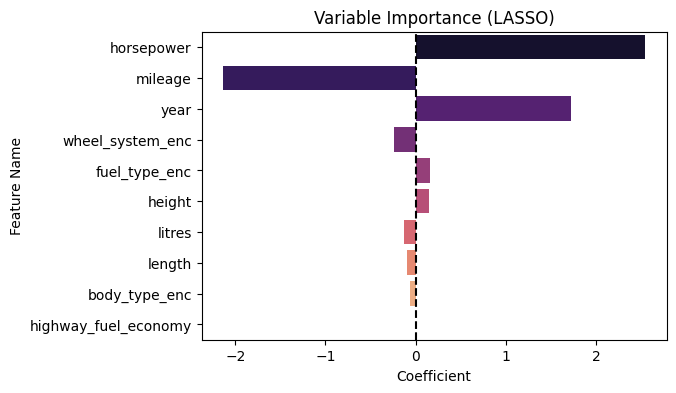

In [52]:

coefficients = pd.DataFrame()
coefficients['feature_name'] = x_train.columns
coefficients['coefficients'] = pd.Series(lr_lasso.coef_)


# Sort the coefficients by absolute value
coefficients = coefficients.reindex(coefficients['coefficients'].abs().sort_values(ascending=False).index)

# Plot the variable importance
plt.figure(figsize=(6, 4))
sns.barplot(data=coefficients, x='coefficients', y='feature_name', palette='magma')
plt.xlabel('Coefficient')
plt.ylabel('Feature Name')
plt.title('Variable Importance (LASSO)')

# Add a dotted vertical line at x = 0
plt.axvline(x=0, color='black', linestyle='--')


plt.show()

In [53]:
small_df.head()

price back_legroom        body_type  engine_displacement  \
0  18495.0      44.5 in     Pickup Truck                 5700   
1  16422.0      41.4 in            Sedan                 1800   
2  39935.0      36.5 in            Sedan                 2000   
3  23949.0      38.7 in  SUV / Crossover                 3500   
4  37545.0      35.2 in            Sedan                 2000   

     exterior_color fuel_type  height  highway_fuel_economy  horsepower  \
0            MAROON  Gasoline    75.6                    18         381   
1  Black Sand Pearl  Gasoline    57.3                    38         132   
2         JET BLACK  Gasoline    58.2                    34         248   
3  Brilliant Silver  Gasoline    67.8                    28         260   
4             Black  Gasoline    56.3                    33         255   

    latitude  length listed_date   longitude  mileage wheel_system wheelbase  \
0  32.803101   228.7  2020-09-02  -96.779701   167184          4X2  145.7 in   
1  38.371700   182.6  2020-07-25  -86.958900    29451          FWD  106.3 in   
2  34.137100   194.6  2020-08-08 -118.255000    14984          RWD  117.1 in   
3  34.064899   192.8  2020-06-21  -81.143600    15697          FWD  111.2 in   
4  38.899200   184.5  2020-09-06  -77.461800     6907          AWD  111.8 in   

   width  year  age_at_listing  
0   79.9  2008              12  
1   69.9  2016               4  
2   83.7  2019               1  
3   75.4  2020               0  
4   79.4  2020               0

In [54]:
test_df = test_df.drop('log_price', axis=1)
test_df.head()

height  highway_fuel_economy  horsepower  length  mileage  year  \
0    58.1                    22         310   180.9    10265  2019   
1    57.3                    36         132   183.1    35574  2017   
2    66.5                    33         190   180.6    10885  2019   
3    58.0                    40         188   191.8     2986  2019   
4    70.6                    24         278   212.3    17085  2019   

   body_type_enc  fuel_type_enc  wheel_system_enc  litres  
0              6              4                 2     2.5  
1              6              4                 3     1.8  
2              5              4                 2     1.5  
3              6              4                 3     2.0  
4              4              4                 1     3.5

In [55]:
min_max_scaler.fit(test_df)

# transform
X_final_scaled = min_max_scaler.transform(test_df)

# Make predictions on the test set using the lr_lasso_cv model
final_pred_test = lr_lasso_cv.predict(X_final_scaled)

# Print the predictions
print(final_pred_test)



[10.50148272  9.55570395 10.12622109 ...  9.75724422 10.62547105
 10.57497591]


In [57]:
predictions_df = pd.DataFrame({'predictions': final_pred_test})

header = pd.DataFrame({
    'predictions': [21108082, 'GojoSatoru', round(r2_cv,3)]
})

header

output_df = pd.concat([header, predictions_df], axis=0)

output_df.to_csv('predictions_output.csv', index=False, header=False)